In [1]:
import os
import pandas as pd
from data.visualize import visualize_dataset
import numpy as np

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
def get_stock_df(df_all: pd.DataFrame, stock: str) -> pd.DataFrame:
    df = df_all[df_all['stock'] == stock]
    return df

['TECH']


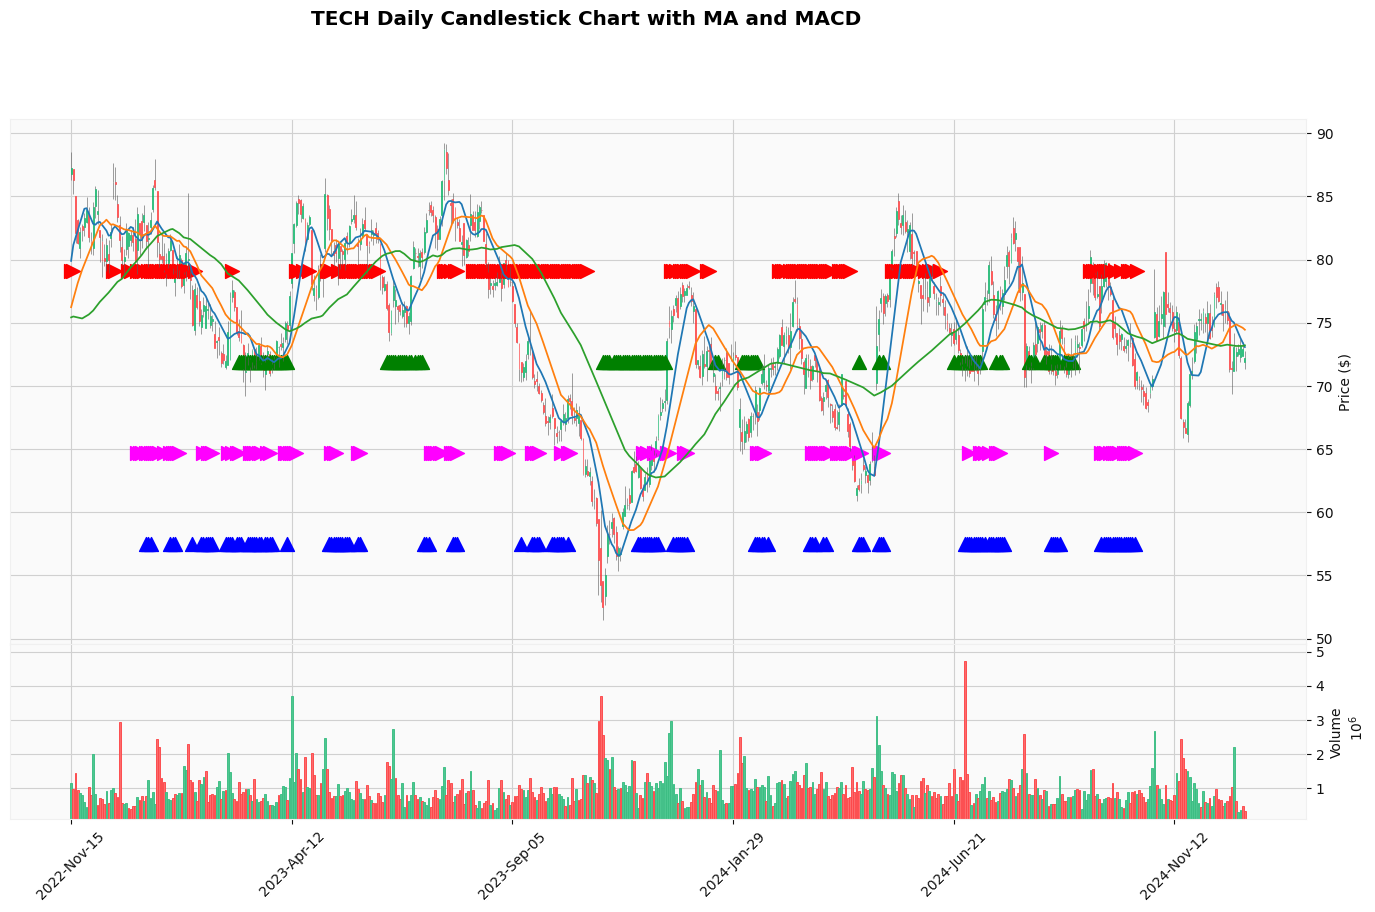

In [9]:
def load_data_file(csv_file):
    if not os.path.exists(csv_file):
        raise FileNotFoundError(
            f"Please run data_fetcher.py to download the data first.")
    else:
        df = pd.read_csv(csv_file)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df

stock = "TECH"
df_all = load_data_file("data/stock_testing_2023-01-01_2024-12-31.csv")
print(df_all["stock"].unique())
df_test = get_stock_df(df_all, stock)
        
visualize_dataset(df_test,
                stock=stock,
                viz_labels=["trend_30days+", "trend_30days-"],
                viz_pred=True,
                plot_macd=False)

In [10]:
columns = df_test.columns
columns = [column for column in columns if "trend_30days" in column]
display(df_test.iloc[20:35][columns])

,trend_30days+,trend_30days-,trend_30days+_pred,trend_30days-_pred,trend_30days+_prob,trend_30days-_prob
Date,,,,,,
2022-12-14,0.0,1.0,NaN,NaN,NaN,NaN
2022-12-15,0.0,0.0,NaN,NaN,NaN,NaN
2022-12-16,0.0,0.0,NaN,NaN,NaN,NaN
2022-12-19,0.0,0.0,NaN,NaN,NaN,NaN
2022-12-20,0.0,0.0,NaN,NaN,NaN,NaN
2022-12-21,0.0,0.0,NaN,NaN,NaN,NaN
2022-12-22,0.0,1.0,NaN,NaN,NaN,NaN
2022-12-23,0.0,1.0,NaN,NaN,NaN,NaN
2022-12-27,0.0,0.0,NaN,NaN,NaN,NaN


In [23]:
def get_false_predictions(df, label_name, positive=True):
    pred = 1 if positive else 0
    row_indices = df.index[df[label_name+"_pred"] == pred]
    gt_labels = df[label_name].loc[row_indices]
    dates = []
    for date, gt in gt_labels.items():
        if not np.isnan(gt) and gt != pred:
            dates.append(date.strftime("%Y-%m-%d"))
    print("# of false predictions: ", len(dates))
    print(dates)
get_false_predictions(df_test, "trend_30days+", positive=True)
get_false_predictions(df_test, "trend_30days+", positive=False)

# of false predictions:  47
['2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-05-11', '2023-05-12', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-31', '2023-06-01', '2023-06-23', '2023-06-26', '2023-06-27', '2023-07-07', '2023-07-13', '2023-07-14', '2023-07-17', '2023-08-25', '2023-09-13', '2023-09-25', '2023-09-28', '2023-10-02', '2023-10-04', '2023-11-06', '2023-12-07', '2023-12-08', '2024-02-02', '2024-02-22', '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-29', '2024-03-01', '2024-03-18', '2024-03-20', '2024-07-29', '2024-07-30', '2024-08-08', '2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-09-03']
# of false predictions:  37
['2023-01-24', '2023-01-25', '2023-01-26', '2023-01-30', '2023-02-21', '2023-03-07', '2023-03-08', '2023-03-30', '2023-03-31', '2023-08-18', '2023-10-05', '2023-12-04', '2024-01-17', '2024-01-18', '2024-01-22', '2024-03-19', '2024-03-25', '2024-04-04', '2024-04-05', '2024-04-30', '202

In [24]:
from data.label import label_columns, label_feature

In [25]:
start_date = "2023-05-01"
end_date = "2023-05-10"
columns = label_columns + [label + "_pred" for label in label_feature]
columns = [column for column in columns if "30" in column]
display(df_test.loc[start_date:end_date][columns])

,30days_max_close,30days_max_duration,30days_min_close,30days_min_duration,trend_30days+,trend_30days-,trend_30days+_pred,trend_30days-_pred
Date,,,,,,,,
2023-05-01,0.187593,36.0,-0.023414,3.0,1.0,0.0,1.0,0.0
2023-05-02,0.208792,35.0,-0.005982,2.0,1.0,0.0,1.0,0.0
2023-05-03,0.207760,34.0,-0.006831,1.0,1.0,0.0,1.0,0.0
2023-05-04,0.216067,33.0,0.008406,1.0,1.0,0.0,1.0,0.0
2023-05-05,0.205930,32.0,0.016861,4.0,1.0,0.0,1.0,0.0
2023-05-08,0.181312,29.0,-0.003897,1.0,1.0,0.0,1.0,0.0
2023-05-09,0.185934,28.0,0.040988,1.0,1.0,0.0,1.0,0.0
2023-05-10,0.139239,27.0,0.042595,5.0,1.0,0.0,1.0,0.0


In [1]:
from data.data_fetcher import create_dataset_with_labels, download_data

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [4]:
stock = "GOOG"
start_date = "2023-01-01"
end_date = "2024-12-31"
# df = download_data(stock, start_date, end_date)

df = create_dataset_with_labels(stock,
                                start_date,
                                end_date,
                                vis=False)

stock GOOG shape: (570, 7), market cap: 2043b


In [5]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_10,MA_20,MA_50,...,20days_min_close,20days_min_duration,trend_20days+,trend_20days-,30days_max_close,30days_max_duration,30days_min_close,30days_min_duration,trend_30days+,trend_30days-
2022-11-21,97.210710,98.366560,95.327477,95.486908,18696900,0.0,0.0,94.966776,93.318698,NaN,...,-0.069707,28.0,0.0,0.0,0.058645,9.0,-0.097777,37.0,0.0,0.0
2022-11-22,95.815728,97.198751,94.071993,96.981537,18868900,0.0,0.0,95.805761,92.940059,NaN,...,-0.084044,27.0,0.0,1.0,0.042330,8.0,-0.111682,36.0,0.0,1.0
2022-11-23,96.991497,98.714311,96.991497,98.466202,17568900,0.0,0.0,96.943672,93.139342,NaN,...,-0.097855,26.0,0.0,1.0,0.026614,7.0,-0.125076,35.0,0.0,1.0
2022-11-25,98.112466,98.585771,97.180815,97.250565,8567800,0.0,0.0,97.285444,93.388447,NaN,...,-0.095697,27.0,0.0,1.0,0.039447,5.0,-0.114139,33.0,0.0,1.0
2022-11-28,96.851999,97.479748,95.546691,95.905403,19974500,0.0,0.0,97.237615,93.372006,NaN,...,-0.083013,24.0,0.0,0.0,0.054026,2.0,-0.101714,30.0,0.0,0.0
2022-11-29,95.656297,96.044900,94.052061,95.098305,20220000,0.0,0.0,97.178827,93.410867,NaN,...,-0.078688,28.0,0.0,0.0,0.062971,1.0,-0.094091,29.0,0.0,0.0
2022-11-30,94.779446,101.086777,94.331052,101.086777,39888100,0.0,0.0,97.450848,93.956406,NaN,...,-0.147757,28.0,0.0,1.0,-0.001676,1.0,-0.147757,28.0,0.0,1.0
2022-12-01,101.036970,102.222704,100.309580,100.917397,21771500,0.0,0.0,97.679029,94.664362,NaN,...,-0.146327,27.0,0.0,1.0,-0.004443,1.0,-0.146327,27.0,0.0,1.0
2022-12-02,99.014237,100.787863,98.814949,100.469009,18821500,0.0,0.0,97.911195,95.528258,96.817326,...,-0.142517,26.0,0.0,1.0,-0.009521,3.0,-0.142517,26.0,0.0,1.0
2022-12-05,99.457640,101.385710,98.999288,99.512444,19955500,0.0,0.0,98.117455,96.184400,96.831276,...,-0.134275,23.0,0.0,1.0,-0.025633,1.0,-0.134275,23.0,0.0,1.0
